In [1]:
# Step 1: Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 2: Load cleaned dataset
df = pd.read_csv('laptopData_CLEAN.csv')

# Check the first few rows
df.head()


,Company,TypeName,Ram,OpSys,Weight,Price,PPI,Cpu processor,Gpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,Mac,1.37,71378.6832,226.983005,Intel Core i5,Intel,0,128,0,0
1,Apple,Ultrabook,8.0,Mac,1.34,47895.5232,127.677940,Intel Core i5,Intel,0,0,0,128
2,HP,Notebook,8.0,Others/No OS/Linux,1.86,30636.0000,141.211998,Intel Core i5,Intel,0,256,0,0
3,Apple,Ultrabook,16.0,Mac,1.83,135195.3360,220.534624,Intel Core i7,AMD,0,512,0,0
4,Apple,Ultrabook,8.0,Mac,1.37,96095.8080,226.983005,Intel Core i5,Intel,0,256,0,0


2.1 Exploration of Data Structure

In [18]:
# Step 2.1.1: Shape of data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Step 2.1.2: Data types and missing values
df.info()

# Step 2.1.3: Descriptive statistics
df.describe()


Dataset contains 1243 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1243 non-null   object 
 1   TypeName       1243 non-null   object 
 2   Ram            1243 non-null   float64
 3   OpSys          1243 non-null   object 
 4   Weight         1243 non-null   float64
 5   Price          1243 non-null   float64
 6   PPI            1243 non-null   float64
 7   Cpu processor  1243 non-null   object 
 8   Gpu_brand      1243 non-null   object 
 9   HDD            1243 non-null   int64  
 10  SSD            1243 non-null   int64  
 11  Hybrid         1243 non-null   int64  
 12  Flash_Storage  1243 non-null   int64  
 13  Cluster        1243 non-null   int32  
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 131.2+ KB


,Ram,Weight,Price,PPI,HDD,SSD,Hybrid,Flash_Storage,Cluster
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,8.522124,2.080024,60604.348449,146.392102,414.851167,185.885760,7.649236,4.543846,1.516492
std,5.585101,0.814046,37439.640893,43.322046,519.231793,186.056551,85.997674,30.814603,0.684785
min,1.000000,0.000200,9270.720000,44.019462,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,32650.250400,127.335675,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,2.040000,52693.920000,141.211998,0.000000,256.000000,0.000000,0.000000,2.000000
75%,8.000000,2.330000,79813.440000,157.350512,1000.000000,256.000000,0.000000,0.000000,2.000000
max,64.000000,11.100000,324954.720000,352.465147,2000.000000,1024.000000,1000.000000,512.000000,2.000000


2.2 Trends & Insights

2.2.1 Target variable Price distribution

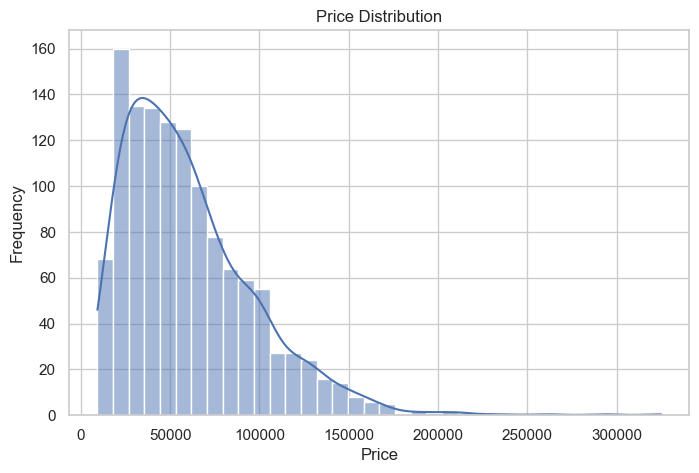

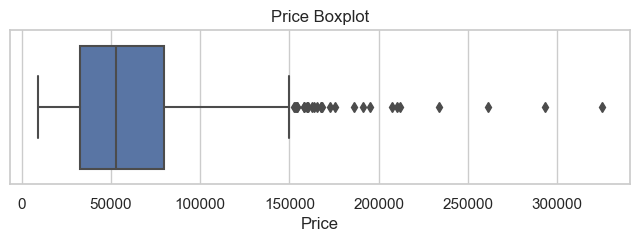

In [4]:
#  Price distribution (Histogram + KDE)
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  Price Boxplot (outliers)
plt.figure(figsize=(8,2))
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.show()


2.2.2 Company

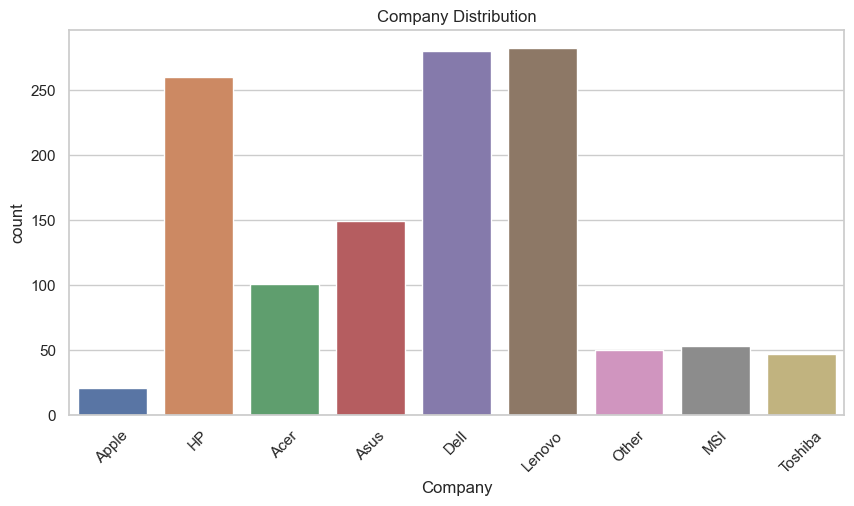

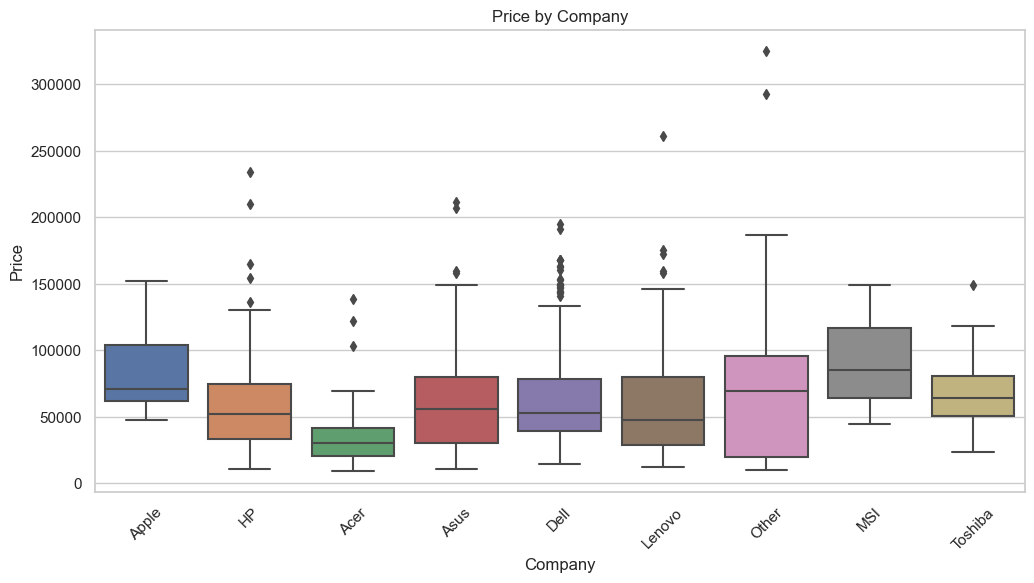

In [5]:
# Company distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Company', data=df)
plt.xticks(rotation=45)
plt.title('Company Distribution')
plt.show()

# Company vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Company')
plt.show()


2.2.3 TypeName

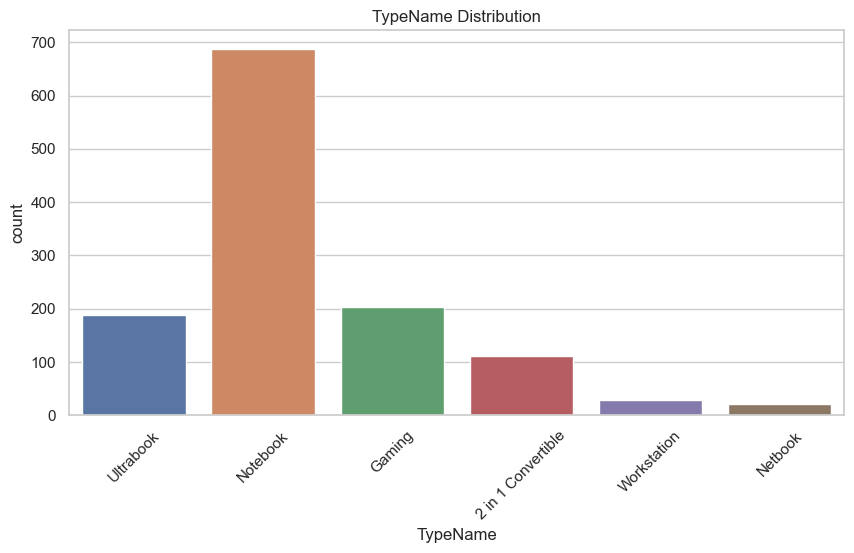

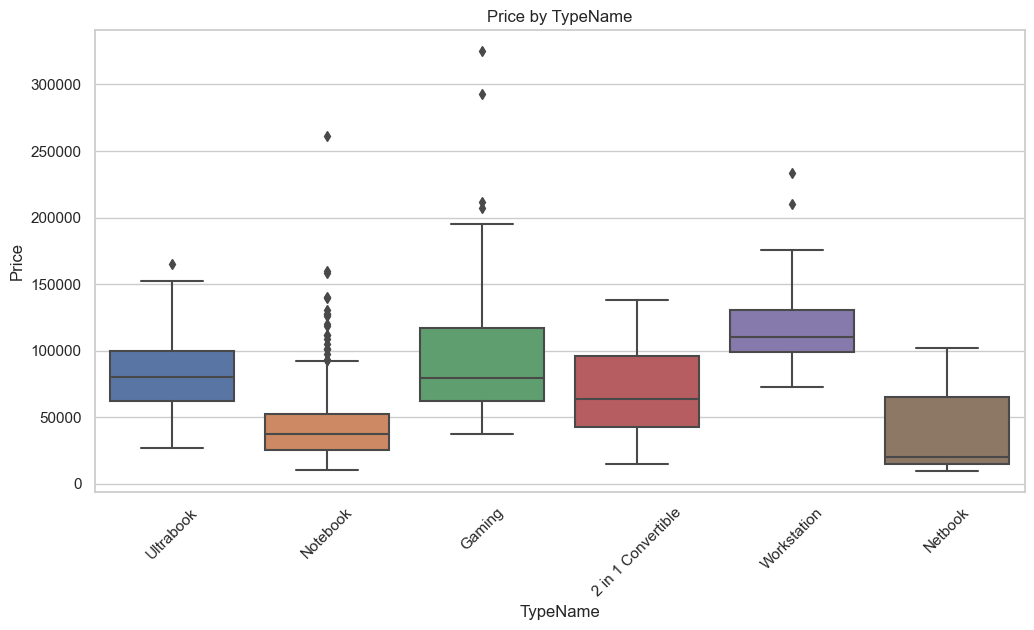

In [6]:
# TypeName distribution
plt.figure(figsize=(10,5))
sns.countplot(x='TypeName', data=df)
plt.xticks(rotation=45)
plt.title('TypeName Distribution')
plt.show()

# TypeName vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='TypeName', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by TypeName')
plt.show()


2.2.4 Operating System

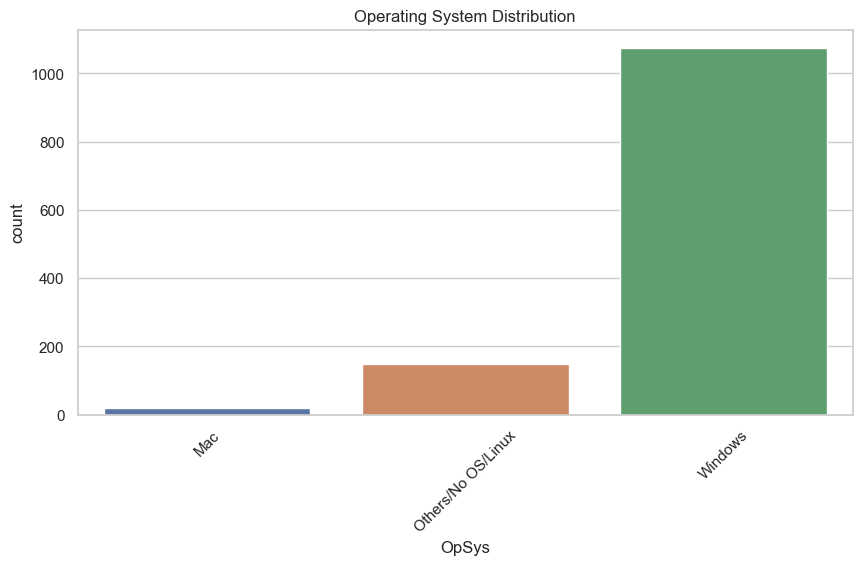

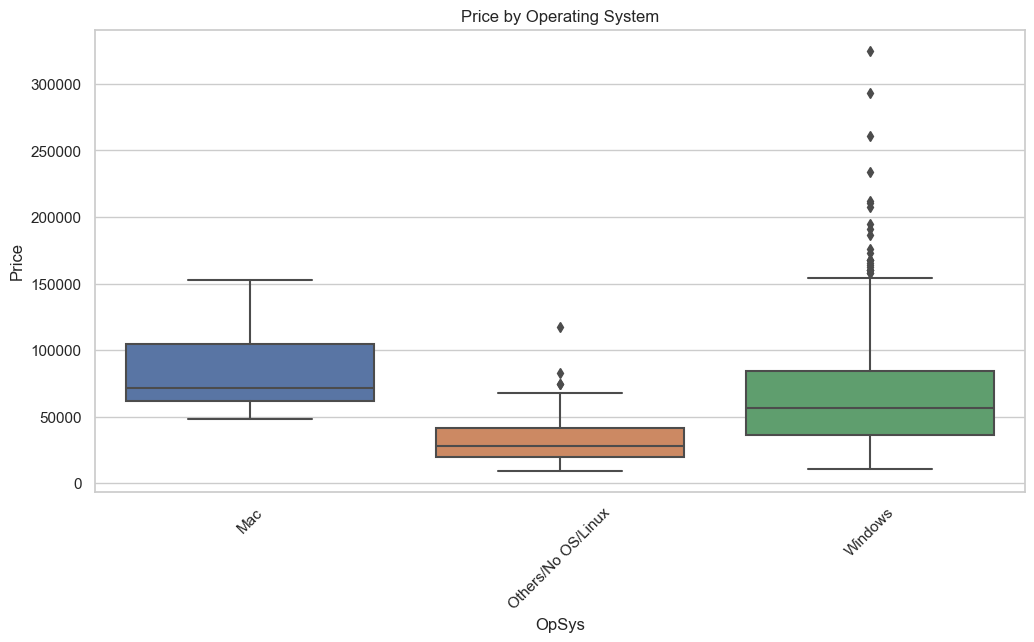

In [7]:
# Operating System distribution
plt.figure(figsize=(10,5))
sns.countplot(x='OpSys', data=df)
plt.xticks(rotation=45)
plt.title('Operating System Distribution')
plt.show()

# Operating System vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='OpSys', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Operating System')
plt.show()


 2.2.5 Cpu Processor

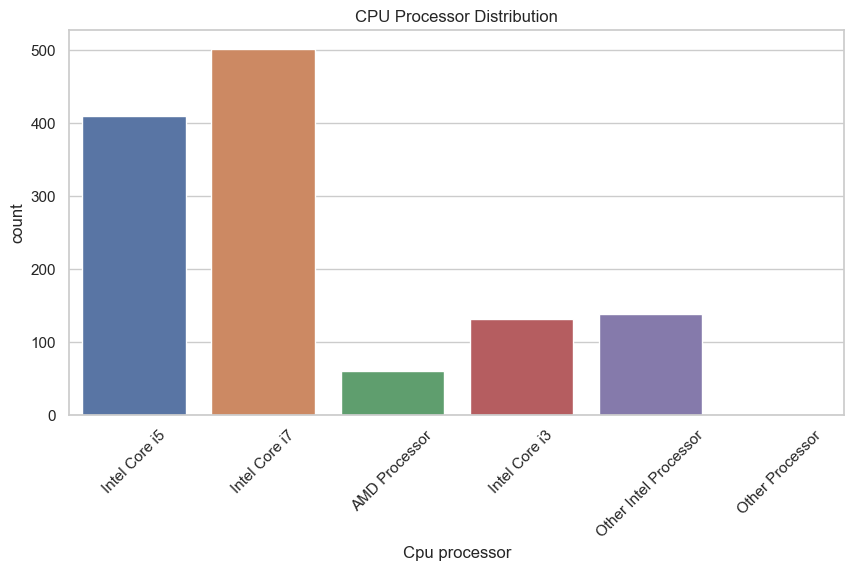

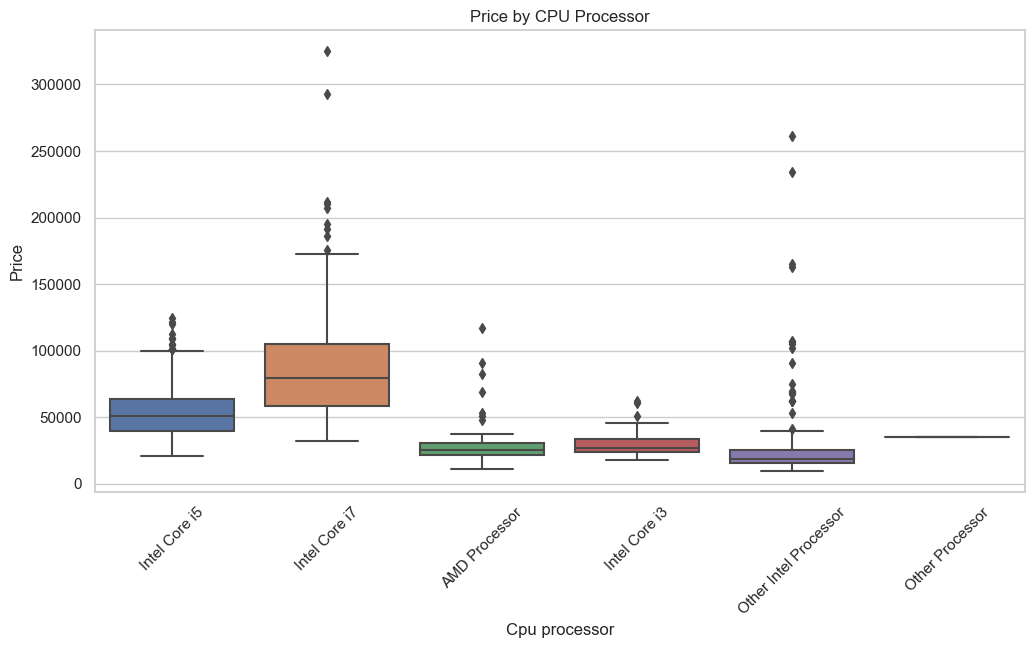

In [8]:
# CPU Processor distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Cpu processor', data=df)
plt.xticks(rotation=45)
plt.title('CPU Processor Distribution')
plt.show()

# CPU Processor vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Cpu processor', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by CPU Processor')
plt.show()


2.2.6 GPU Brand

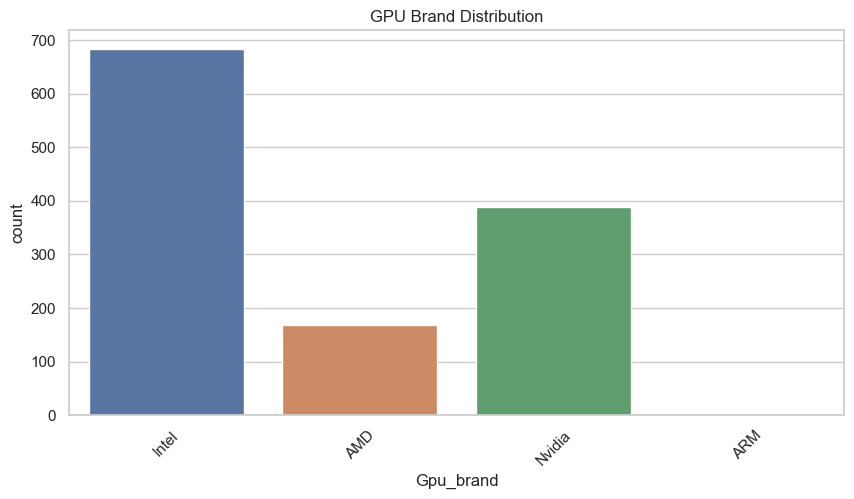

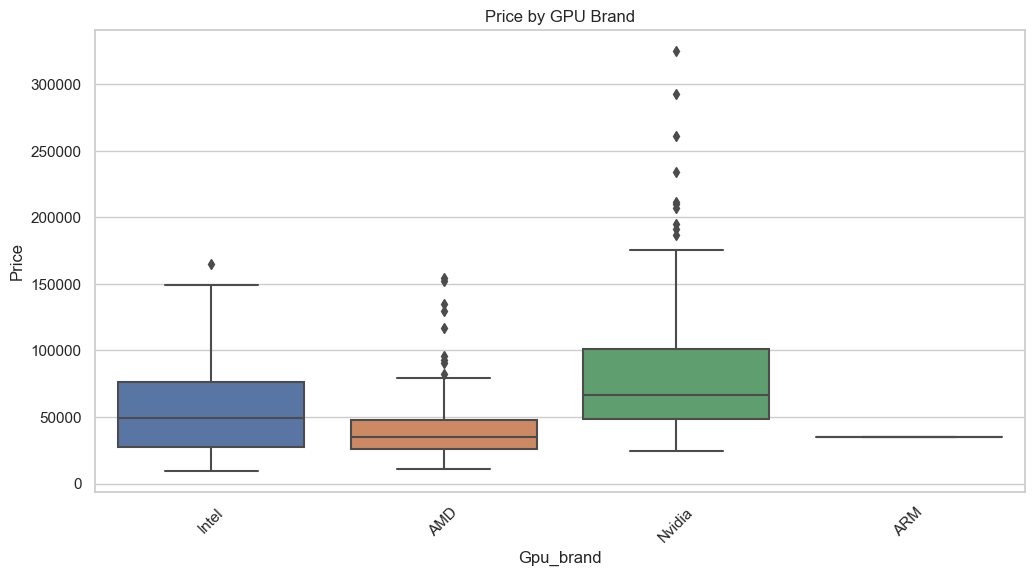

In [9]:
# GPU Brand distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Gpu_brand', data=df)
plt.xticks(rotation=45)
plt.title('GPU Brand Distribution')
plt.show()

# GPU Brand vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Gpu_brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by GPU Brand')
plt.show()


2.3 Exploration of Data Structure

2.3.1 RAM vs Price

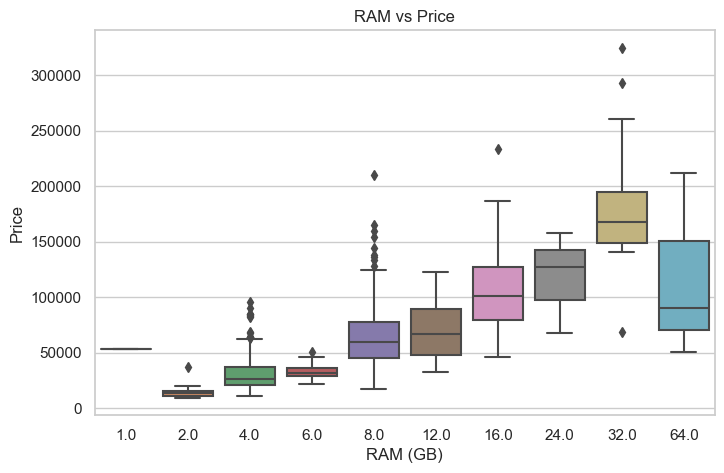

In [10]:
# RAM vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Ram', y='Price', data=df)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()


 2.3.2 Weight vs Price

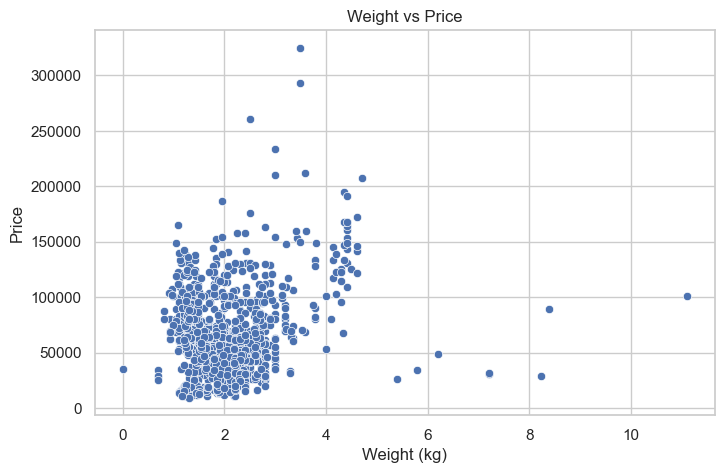

In [11]:
# Weight vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title('Weight vs Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.show()


2.3.3 PPI vs Price

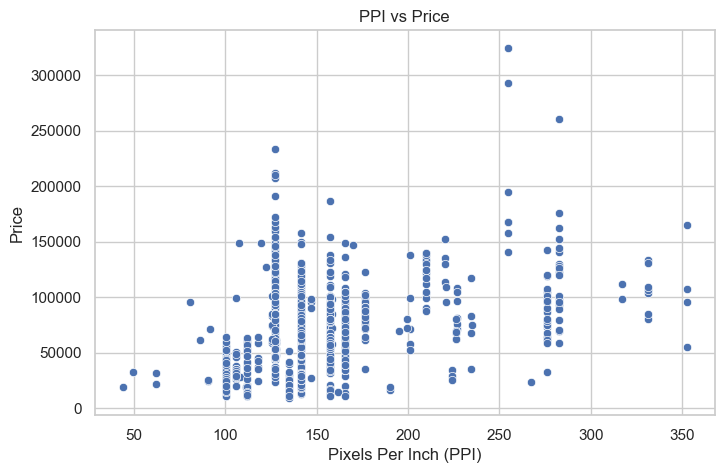

In [12]:
# PPI vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='PPI', y='Price', data=df)
plt.title('PPI vs Price')
plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.show()


2.3.4 Storage Configuration vs Price

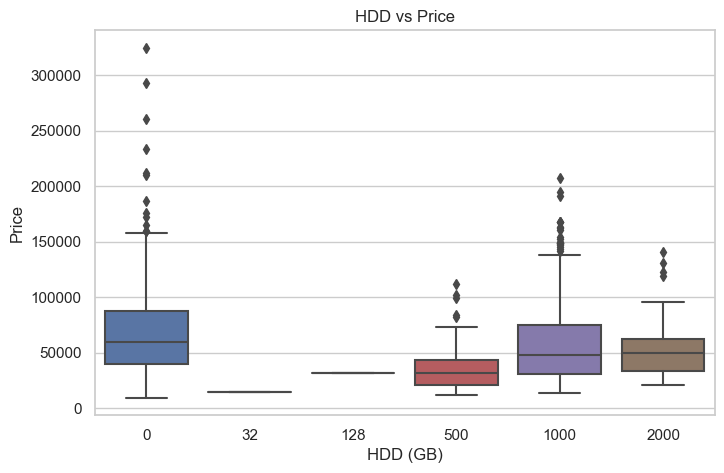

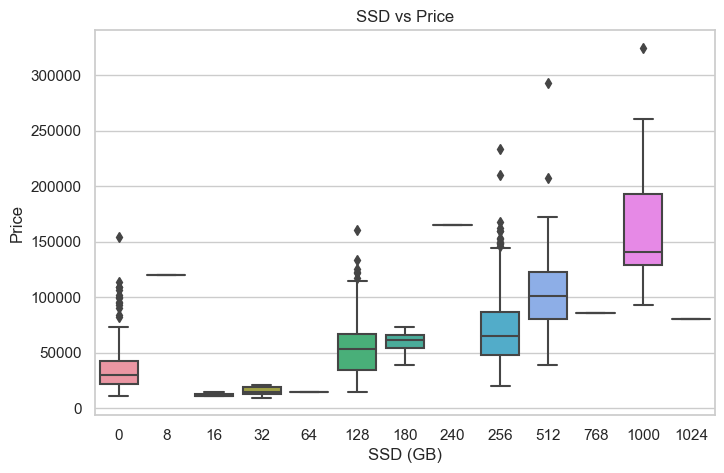

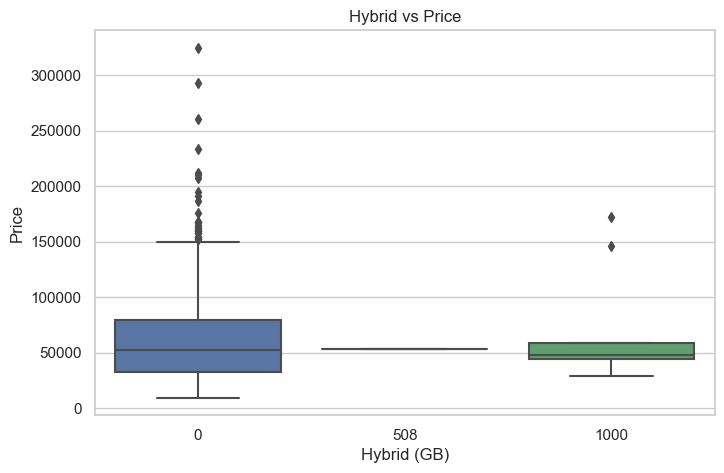

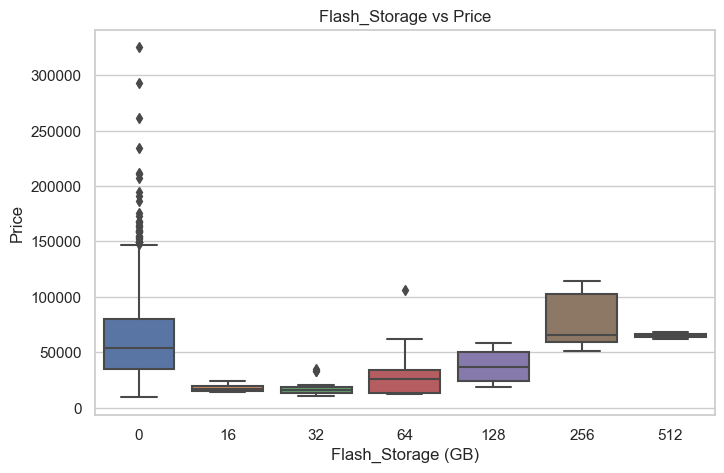

In [13]:
# Storage types vs Price
storage_cols = ['HDD', 'SSD', 'Hybrid', 'Flash_Storage']

for col in storage_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
    plt.xlabel(f'{col} (GB)')
    plt.ylabel('Price')
    plt.show()


2.4 Correlation Analysis (Explore the correlations between numerical features.)

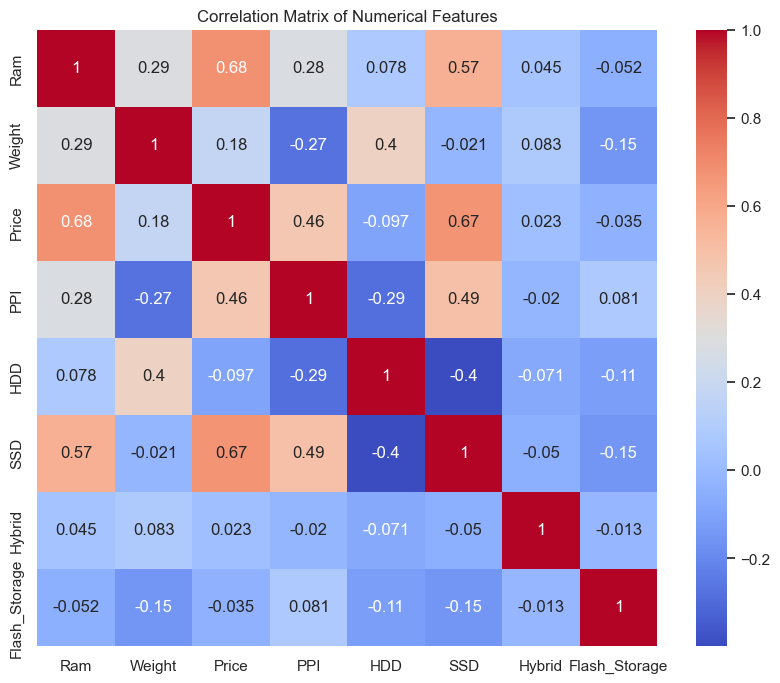

In [15]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


2.5 Unsupervised Learning Analysis (Apply unsupervised learning methods to discover hidden structures in the data.)

2.5.1 KMeans Clustering

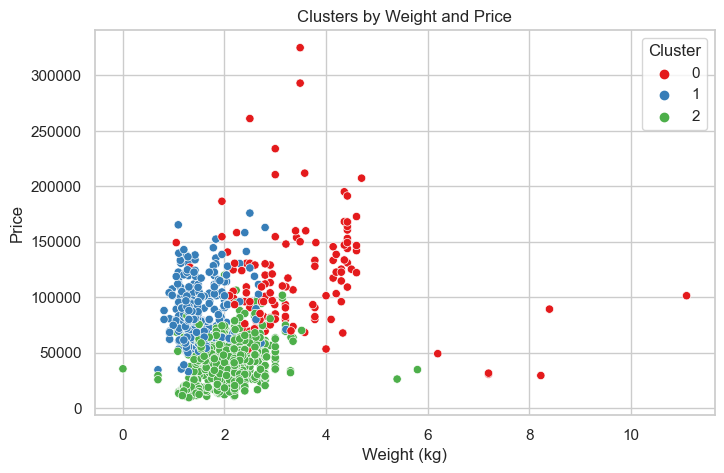

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select numeric features
X = df[['Ram', 'Weight', 'PPI', 'Price', 'SSD']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Weight', y='Price', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters by Weight and Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()


2.5.2 PCA for Dimensionality Reduction

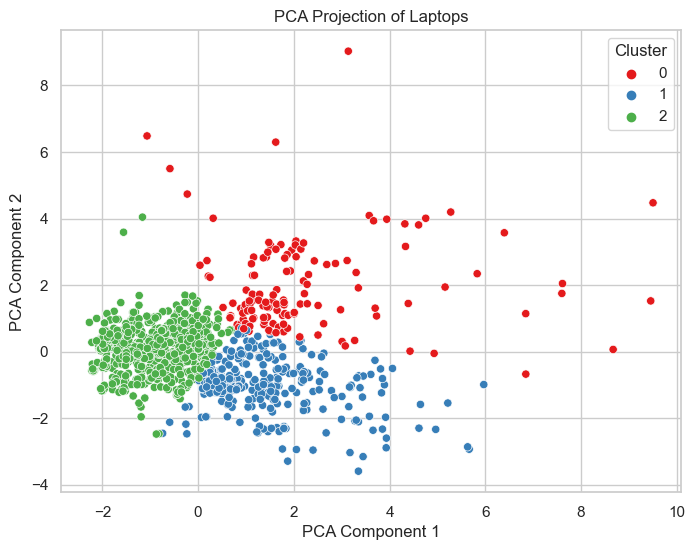

In [17]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['Cluster'], palette='Set1')
plt.title('PCA Projection of Laptops')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
